In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the data
data = pd.read_csv('injury_history(muscle_imbalance_data).csv', encoding='ascii')

# Display the first few rows of the dataframe
data.head()

,Player.ID,Session ID,Player Name,Date Recorded,Hamstring To Quad Ratio,Quad Imbalance Percent,HamstringImbalance Percent,Calf Imbalance Percent,Groin Imbalance Percent
0,112,101,Anthony Lopez,1/1/2023,0.808741,-10.149294,-8.208145,-10.176416,-10.258755
1,112,102,Anthony Lopez,2/1/2023,0.814355,-10.105784,-8.229693,-10.106144,-10.063777
2,112,103,Anthony Lopez,3/1/2023,0.887331,-10.027546,-8.897757,-10.257486,-9.990676
3,112,104,Anthony Lopez,4/1/2023,0.929176,-10.137407,-9.419432,-10.220899,-10.179258
4,112,105,Anthony Lopez,5/1/2023,0.866234,-9.958386,-8.626291,-10.412659,-10.208611


In [7]:

#Basic Information and Data Types
print("Basic Info:")
print(data.info())

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player.ID                   182 non-null    int64  
 1   Session ID                  182 non-null    int64  
 2   Player Name                 182 non-null    object 
 3   Date Recorded               182 non-null    object 
 4   Hamstring To Quad Ratio     182 non-null    float64
 5   Quad Imbalance Percent      182 non-null    float64
 6   HamstringImbalance Percent  182 non-null    float64
 7   Calf Imbalance Percent      182 non-null    float64
 8   Groin Imbalance Percent     182 non-null    float64
dtypes: float64(5), int64(2), object(2)
memory usage: 12.9+ KB
None


In [8]:
# Check for Missing Values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Player.ID                     0
Session ID                    0
Player Name                   0
Date Recorded                 0
Hamstring To Quad Ratio       0
Quad Imbalance Percent        0
HamstringImbalance Percent    0
Calf Imbalance Percent        0
Groin Imbalance Percent       0
dtype: int64


In [9]:
# Check for Zero Values in each column
print("\nZero Value Counts:")
print((data == 0).sum())


Zero Value Counts:
Player.ID                      0
Session ID                     0
Player Name                    0
Date Recorded                  0
Hamstring To Quad Ratio        0
Quad Imbalance Percent         4
HamstringImbalance Percent     4
Calf Imbalance Percent         9
Groin Imbalance Percent       13
dtype: int64


In [10]:
# Descriptive Statistics
print("\nDescriptive Statistics:")
data.describe()



Descriptive Statistics:


,Player.ID,Session ID,Hamstring To Quad Ratio,Quad Imbalance Percent,HamstringImbalance Percent,Calf Imbalance Percent,Groin Imbalance Percent
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,107.785714,107.005495,0.710245,2.507109,0.977946,2.417864,2.439639
std,4.406576,3.749766,0.229502,8.488143,6.371643,8.448975,8.473919
min,101.000000,101.000000,0.400000,-11.506832,-11.196928,-11.719519,-11.677551
25%,104.000000,104.000000,0.491117,-3.596268,-2.378335,-3.154920,-3.367900
50%,107.500000,107.000000,0.689671,4.544213,2.657033,4.579689,4.507973
75%,112.000000,110.000000,0.864447,6.831090,5.572970,6.618700,6.664962
max,115.000000,113.000000,1.200000,15.234443,13.037198,14.879619,14.992623


In [11]:
# Check for Duplicate Rows
print("\nDuplicate Rows:")
duplicates = data.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")



Duplicate Rows:
Number of duplicate rows: 0


In [12]:
# Unique Values in Categorical Columns (like 'Player Name')
categorical_columns = data.select_dtypes(include=['object']).columns
print("\nUnique Values in Categorical Columns:")
for col in categorical_columns:
    print(f"{col}: {data[col].nunique()} unique values")


Unique Values in Categorical Columns:
Player Name: 14 unique values
Date Recorded: 13 unique values


**Initial Insights**

***No Missing Values***: All columns are complete, which simplifies the analysis.

***Descriptive Statistics***:
- Hamstring to Quad Ratio ranges from 0.4 to 1.2, with a mean of 0.71. A higher ratio might indicate stronger hamstrings relative to quads.
- Quad, Hamstring, Calf, and Groin Imbalance Percentages range from approximately -11% to +15%, with mean values close to zero. This suggests that most imbalances are relatively minor, but significant deviations exist, especially in the hamstring and calf imbalances.

In [13]:
# Convert 'Date Recorded' to datetime format
data['Date Recorded'] = pd.to_datetime(data['Date Recorded'])

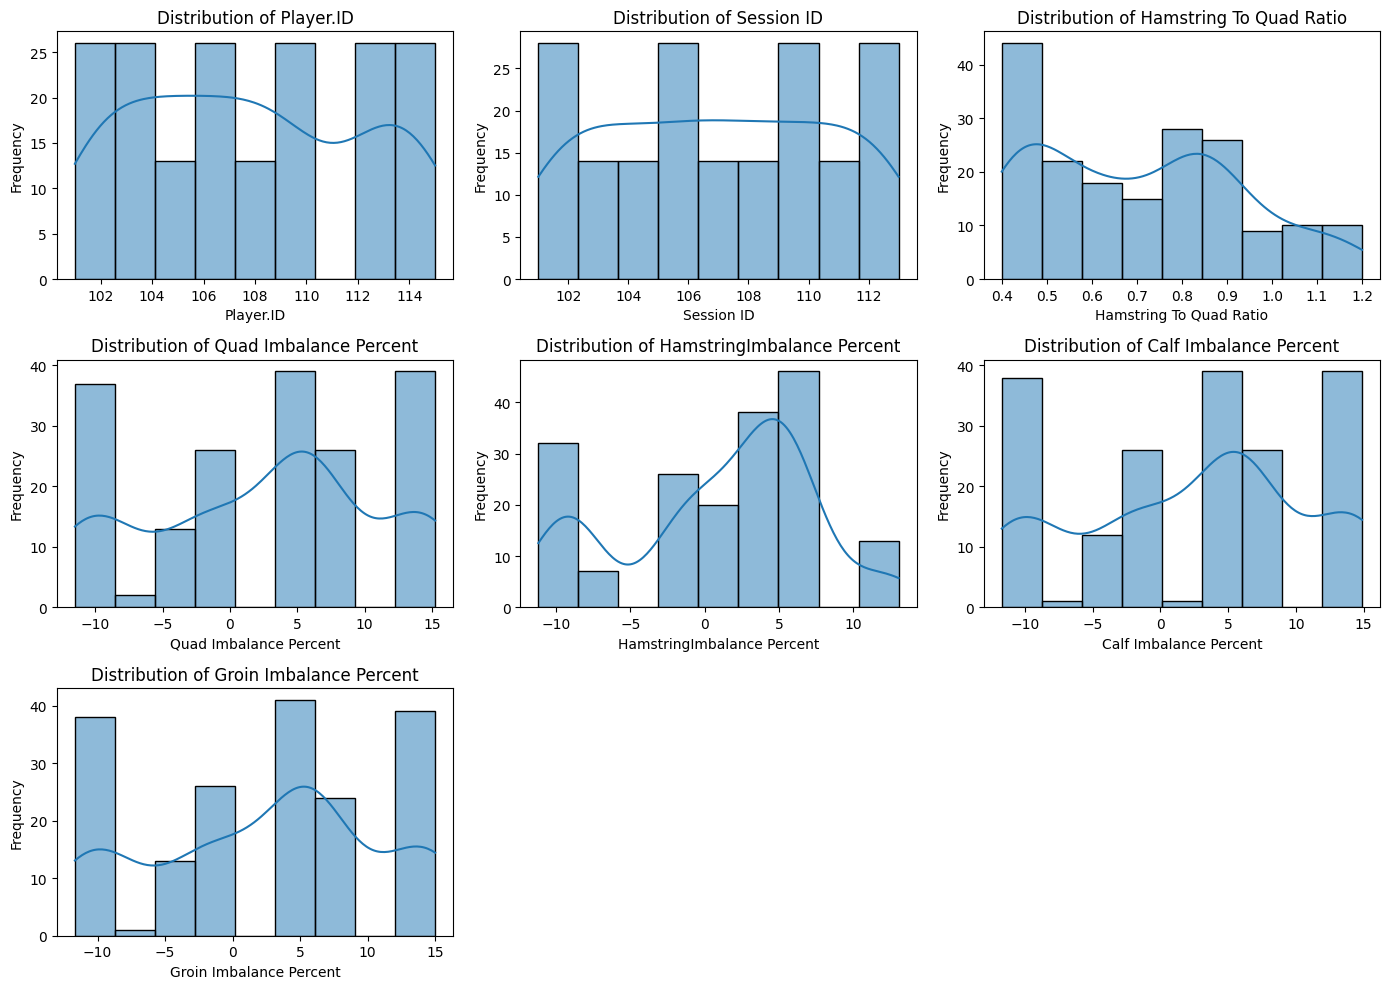

In [14]:
# Distribution of each Numeric Column
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))
for i, column in enumerate(data.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

- **Hamstring to Quad Ratio**: Most values cluster around 0.5–0.8, with a smaller set reaching up to 1.2. This may indicate that players generally have balanced hamstring-to-quad ratios, with a few having notably higher ratios.
- **Quad Imbalance Percent**: The distribution is slightly skewed to the right, suggesting that a subset of players has a higher imbalance, which could be a risk factor.
- **Hamstring Imbalance Percent**: This feature displays a broader distribution, implying varying levels of hamstring imbalance across players.
- **Calf and Groin Imbalance Percentages**: Both have similar distributions, with a noticeable spread. Players with extreme values in these metrics might be at higher risk for injuries.

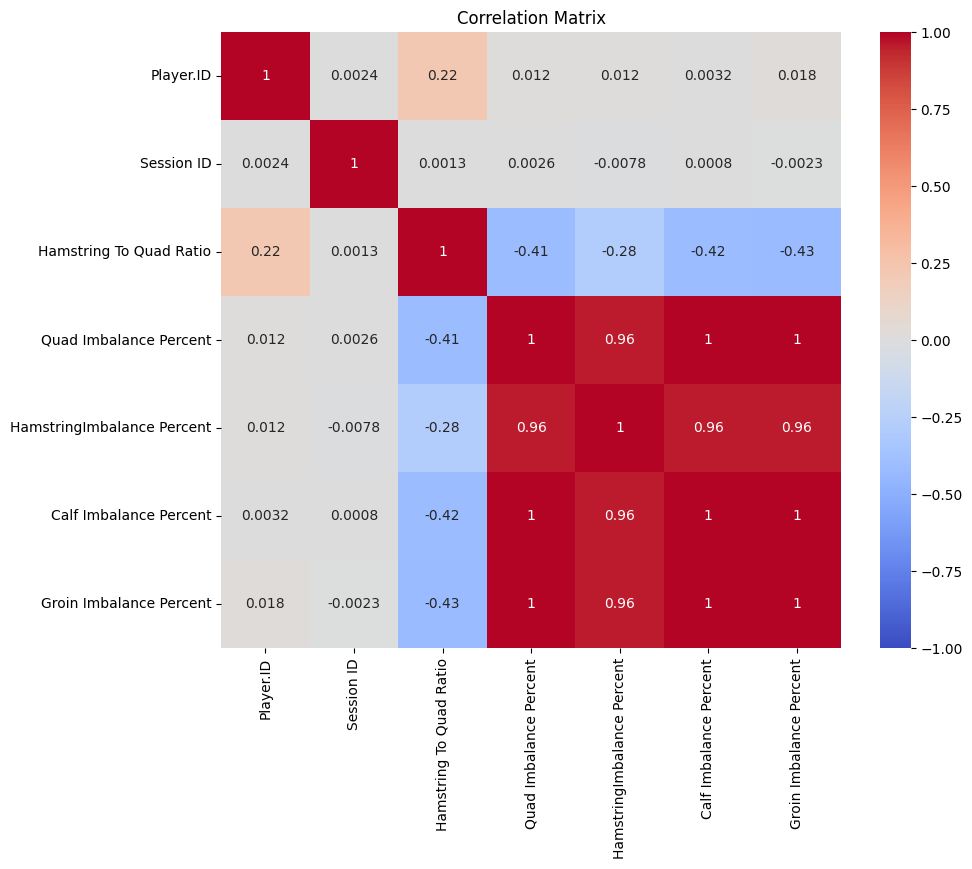

In [15]:
# Correlation Analysis: Checking correlations between numerical columns
plt.figure(figsize=(10, 8))
correlation_matrix = data.select_dtypes(include=['float64', 'int64']).corr()  # Only numeric columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

**Insights from Correlation Analysis**

- **Hamstring and Quad Imbalance**: These metrics show a positive correlation, suggesting that players with an imbalance in one muscle group may also experience imbalances in the other. This correlation could be significant for injury prediction, as overall muscle imbalance might increase injury risk.
- **Calf and Groin Imbalance**: These are moderately correlated with each other, possibly indicating that calf and groin muscle imbalances often coexist, potentially due to lower limb strength imbalances.
- **Hamstring to Quad Ratio and Other Imbalances**: The hamstring-to-quad ratio shows minimal correlation with other imbalance metrics, indicating it may be a distinct feature contributing uniquely to injury risk.

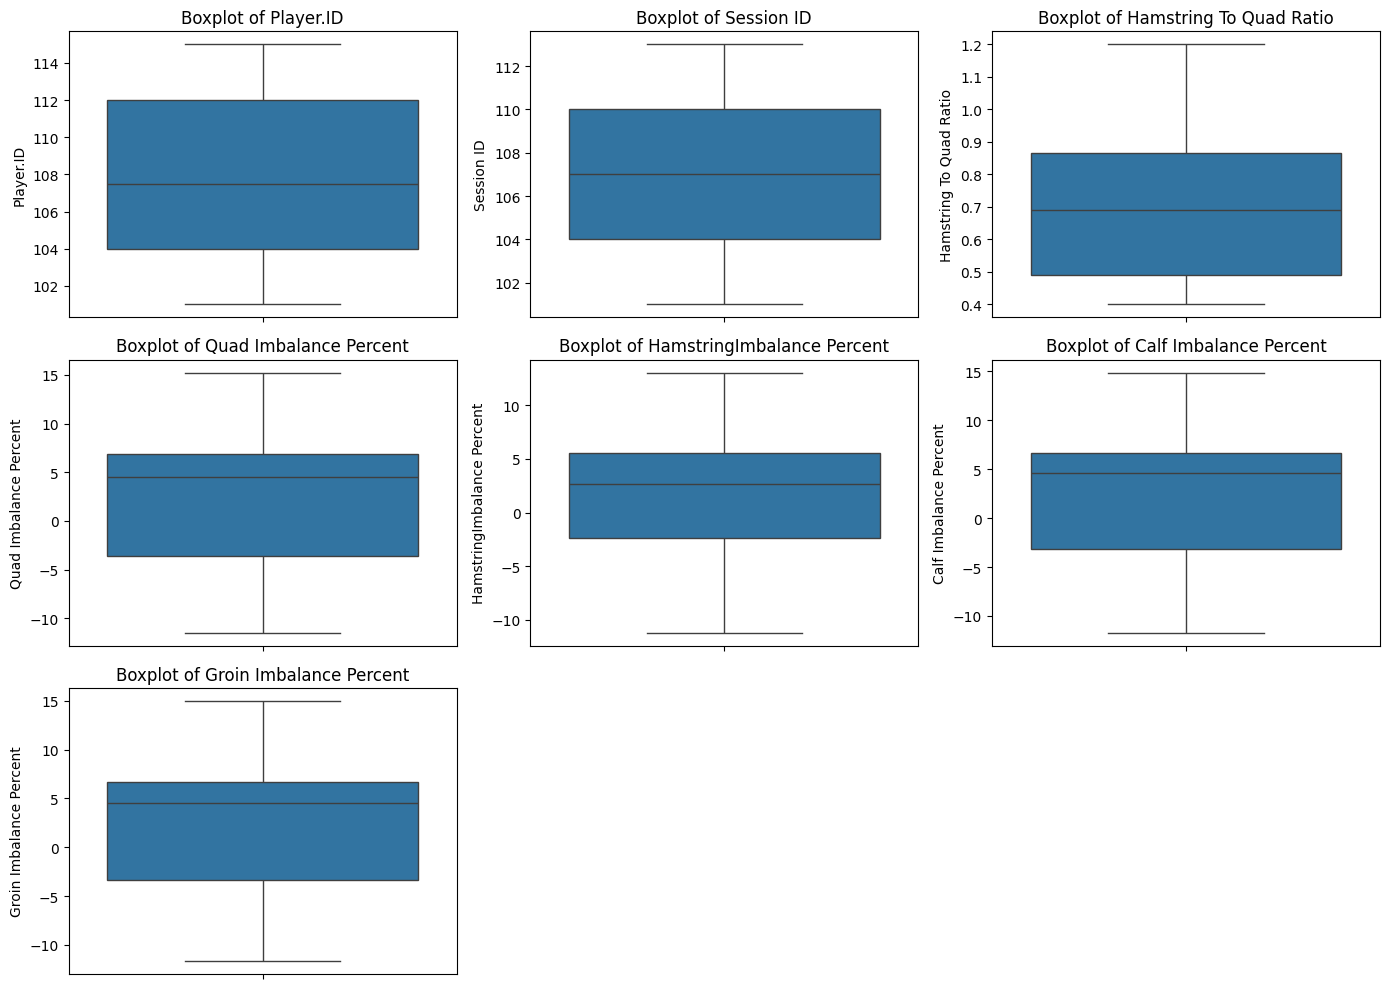

In [16]:
# Outlier Detection using Boxplots for each numerical attribute
plt.figure(figsize=(14, 10))
for i, column in enumerate(data.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


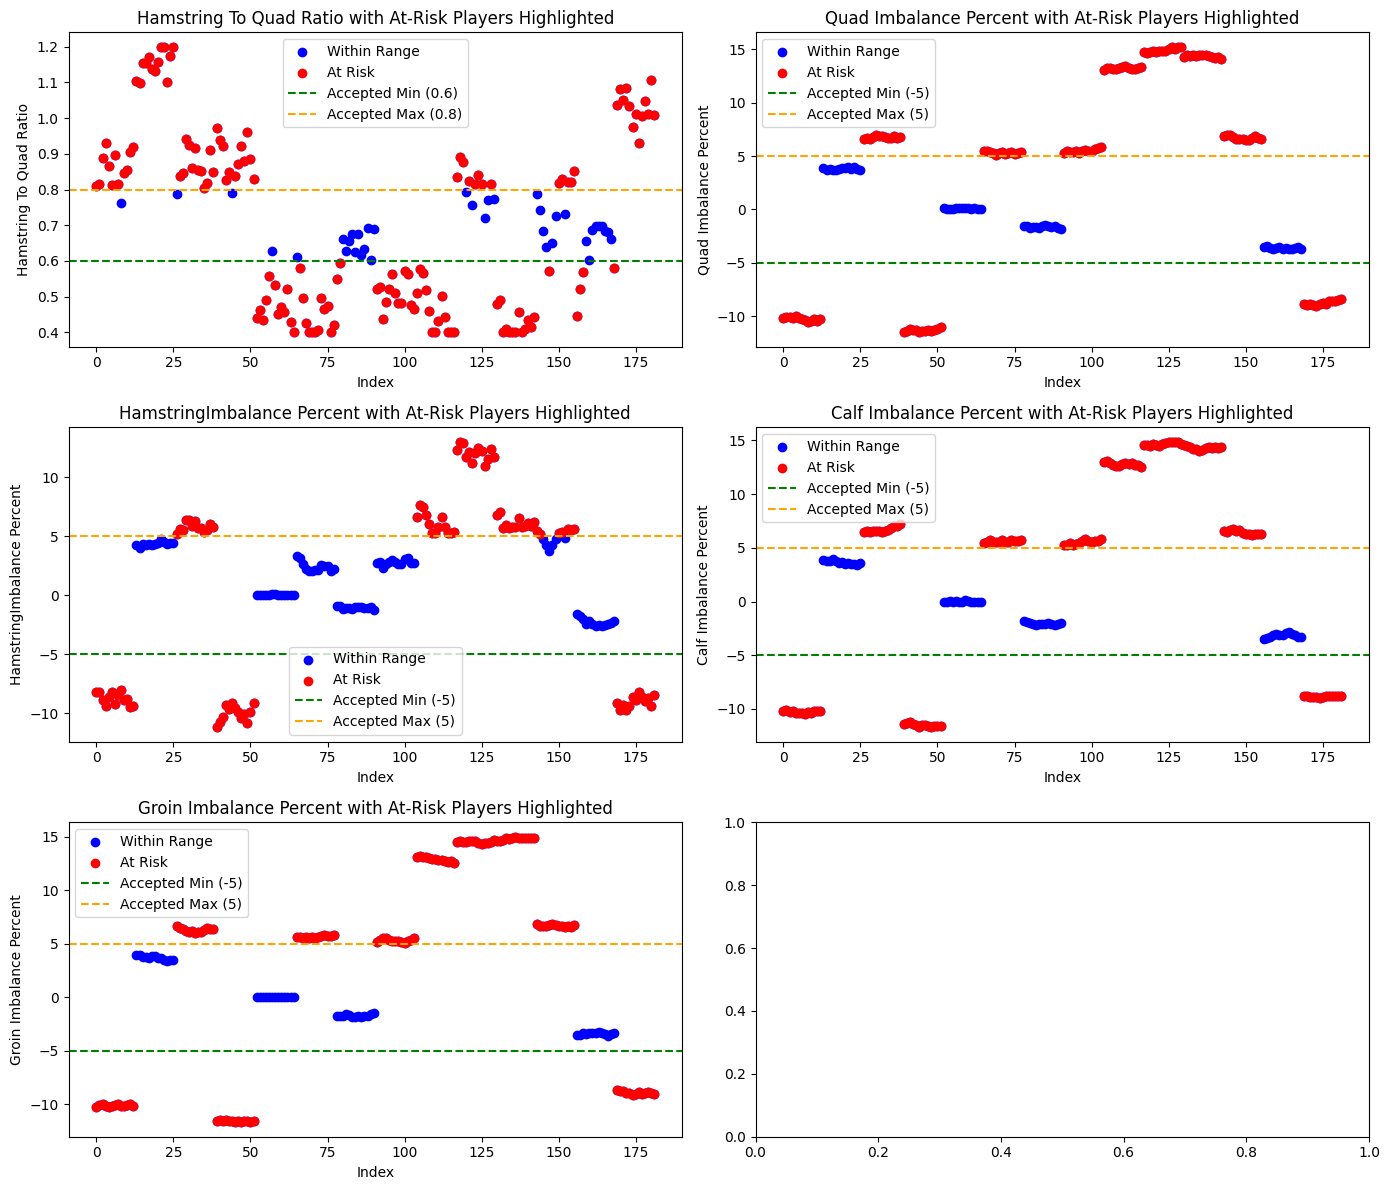

In [24]:
# Define accepted ranges for each attribute
accepted_ranges = {
    "Hamstring To Quad Ratio": (0.6, 0.8),
    "Quad Imbalance Percent": (-5, 5),
    "HamstringImbalance Percent": (-5, 5),
    "Calf Imbalance Percent": (-5, 5),
    "Groin Imbalance Percent": (-5, 5)
}

# Plotting each attribute with accepted range and outliers highlighted
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()

for i, (attribute, (min_val, max_val)) in enumerate(accepted_ranges.items()):
    # Scatter plot with points outside the range in a different color
    at_risk = (data[attribute] < min_val) | (data[attribute] > max_val)
    
    # Plot all points
    axes[i].scatter(data.index, data[attribute], color='blue', label='Within Range')
    # Highlight points outside the accepted range
    axes[i].scatter(data[at_risk].index, data[at_risk][attribute], color='red', label='At Risk')
    
    # Add accepted range lines
    axes[i].axhline(y=min_val, color='green', linestyle='--', label=f'Accepted Min ({min_val})')
    axes[i].axhline(y=max_val, color='orange', linestyle='--', label=f'Accepted Max ({max_val})')
    
    # Set labels and title
    axes[i].set_title(f'{attribute} with At-Risk Players Highlighted')
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel(attribute)
    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()


- **Hamstring to Quad Ratio (0.6-0.8)**: Most players fall within range, but some exceed 0.8, indicating higher hamstring strength relative to quads, potentially elevating injury risk.

- **Quad Imbalance Percent (-5% to +5%)**: Some players exceed this range, suggesting quad strength imbalances that could lead to instability and increase injury susceptibility.

- **Hamstring Imbalance Percent (-5% to +5%)**: Outliers here may indicate players prone to hamstring injuries, common in high-intensity sports.

- **Calf Imbalance Percent (-5% to +5%)**: Players with values outside this range may face lower limb stability issues, increasing the risk of calf or Achilles injuries.

- **Groin Imbalance Percent (-5% to +5%)**: Excessive groin imbalances may elevate the risk of strains or other lower-body injuries.

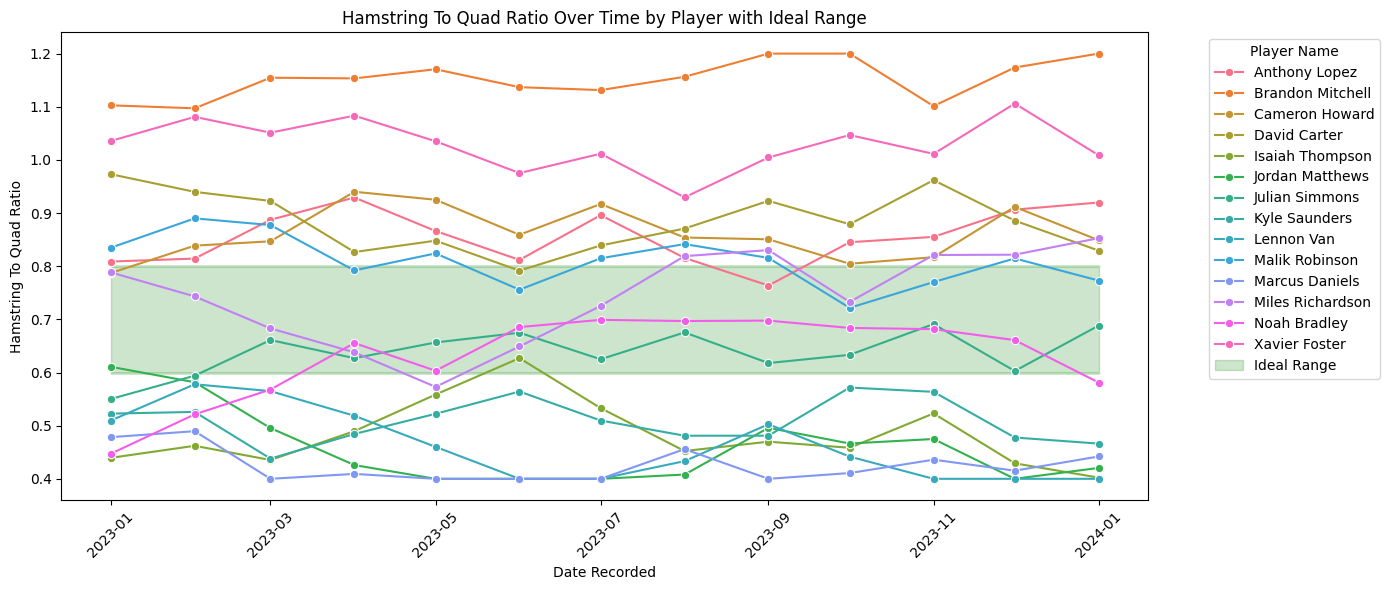

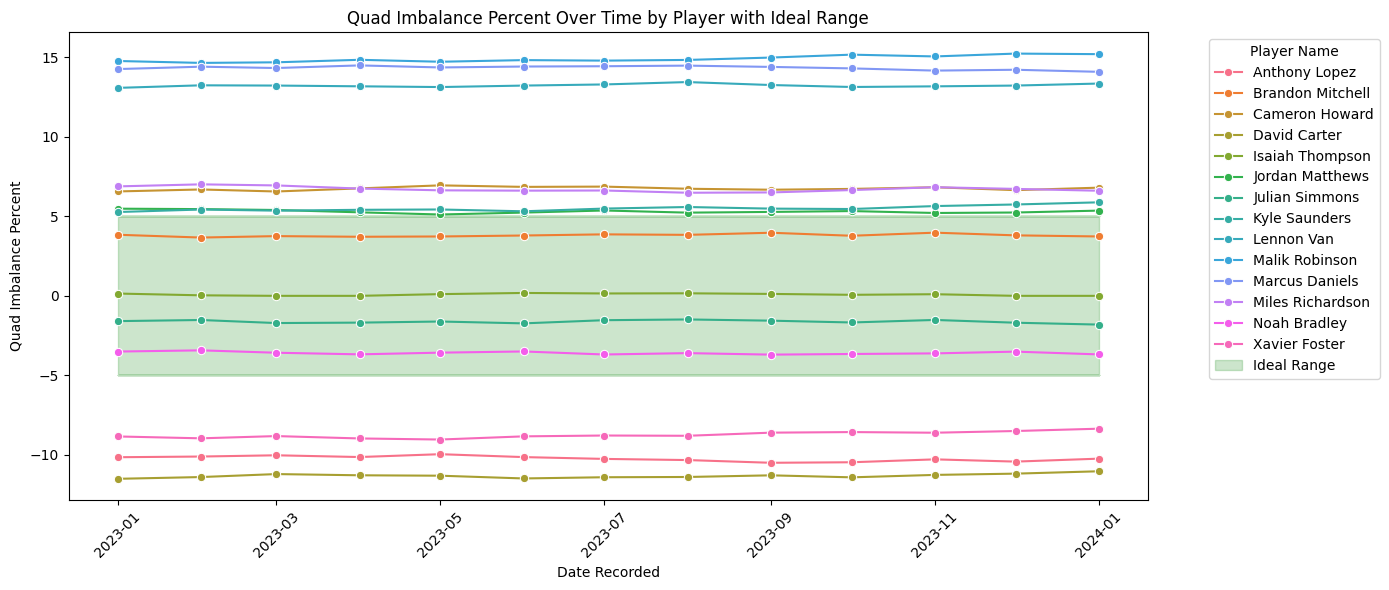

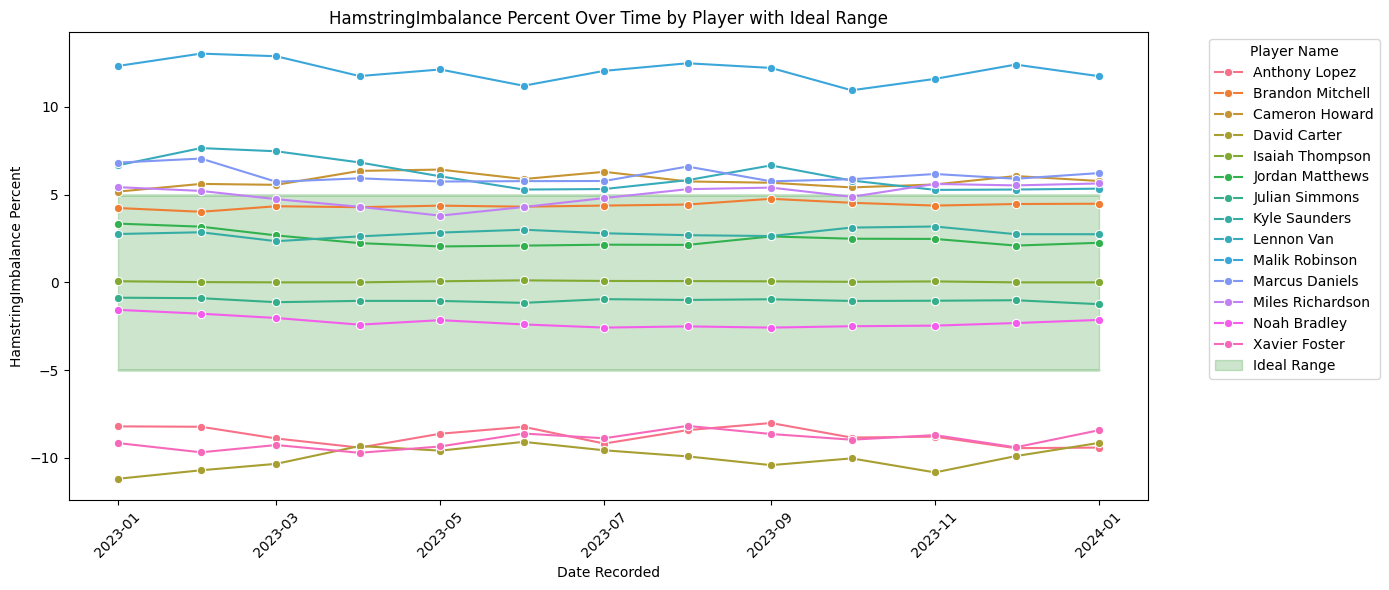

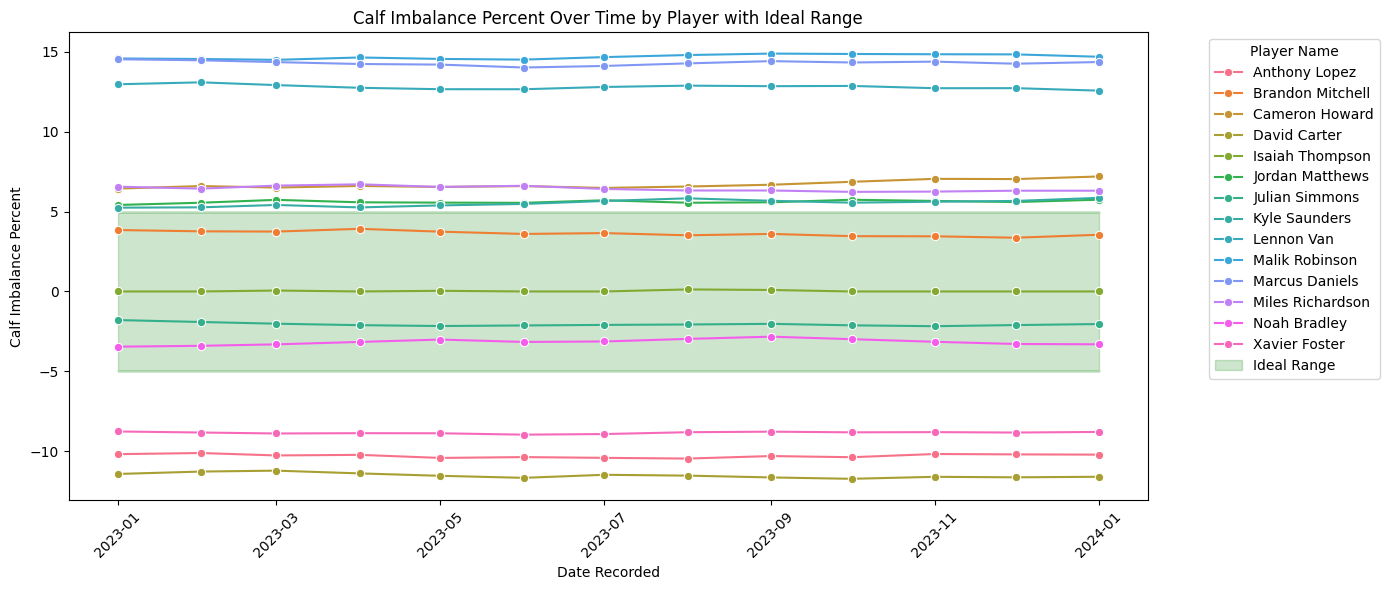

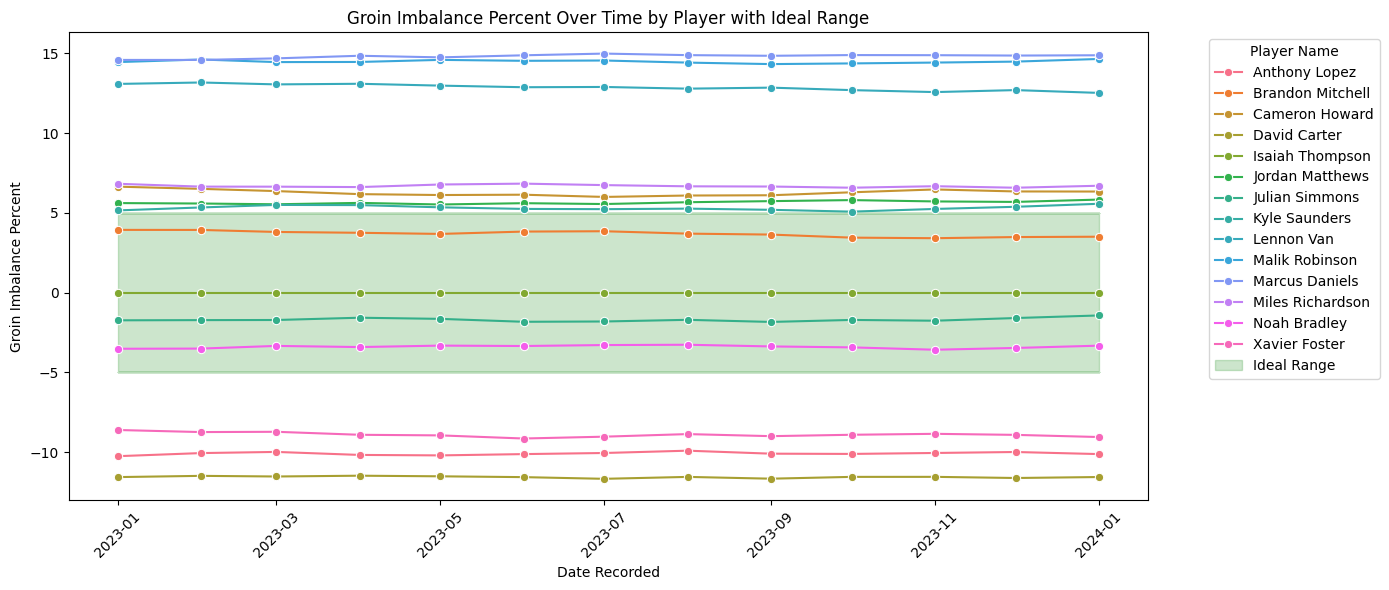

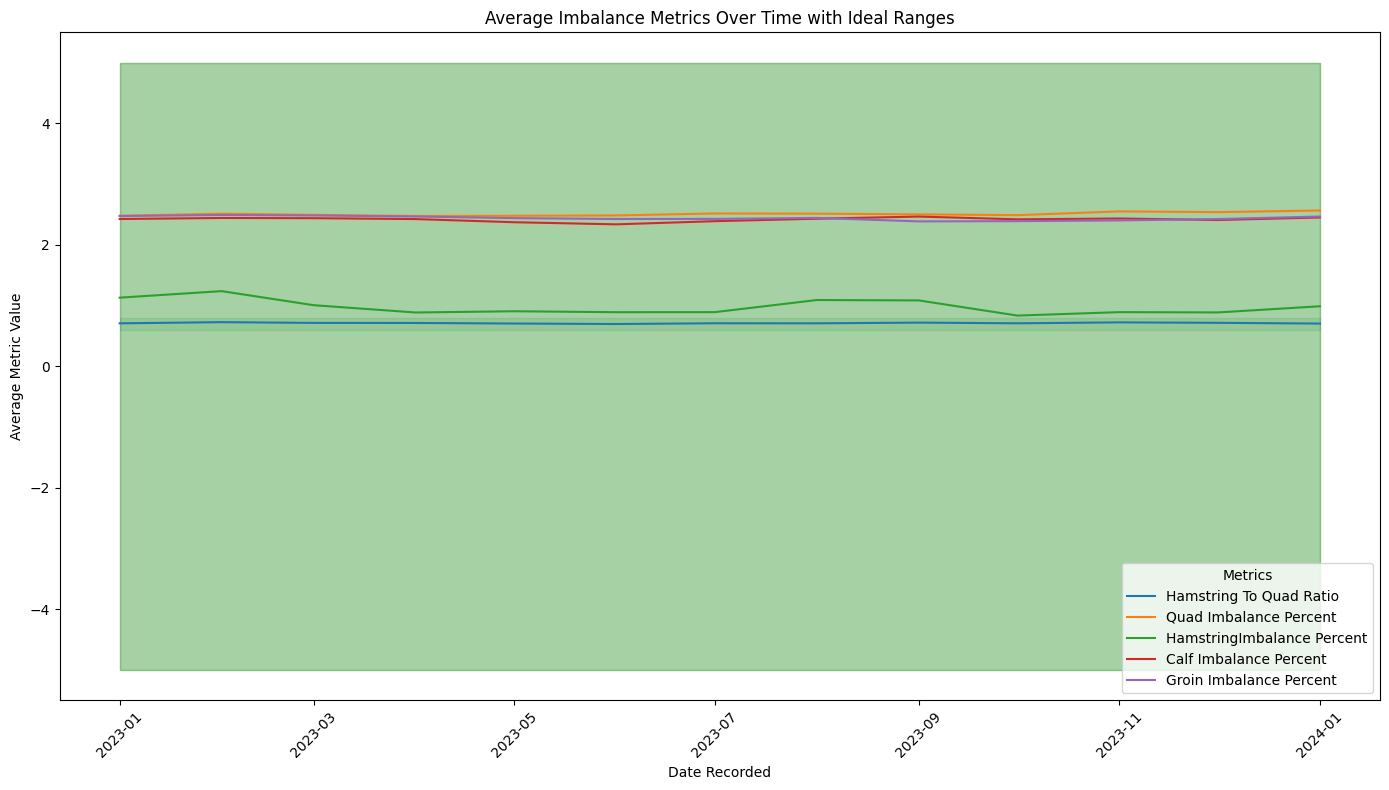

In [19]:
# Define ideal ranges for each metric
ideal_ranges = {
    "Hamstring To Quad Ratio": (0.6, 0.8),
    "Quad Imbalance Percent": (-5, 5),
    "HamstringImbalance Percent": (-5, 5),
    "Calf Imbalance Percent": (-5, 5),
    "Groin Imbalance Percent": (-5, 5)
}

# Plot each imbalance metric over time for each player with ideal range
for metric in ideal_ranges.keys():
    plt.figure(figsize=(14, 6))
    
    # Plotting individual player trends
    sns.lineplot(data=data, x='Date Recorded', y=metric, hue='Player Name', marker='o')
    
    # Adding ideal range as a shaded area
    ideal_min, ideal_max = ideal_ranges[metric]
    plt.fill_between(data['Date Recorded'], ideal_min, ideal_max, color='green', alpha=0.2, label='Ideal Range')
    
    # Set labels and titles
    plt.title(f'{metric} Over Time by Player with Ideal Range')
    plt.xlabel('Date Recorded')
    plt.ylabel(metric)
    plt.legend(title='Player Name', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot overall trend for each metric with ideal range
avg_metrics_over_time = data.groupby('Date Recorded')[list(ideal_ranges.keys())].mean()

plt.figure(figsize=(14, 8))
for metric, (ideal_min, ideal_max) in ideal_ranges.items():
    sns.lineplot(data=avg_metrics_over_time, x=avg_metrics_over_time.index, y=metric, label=metric)
    plt.fill_between(avg_metrics_over_time.index, ideal_min, ideal_max, color='green', alpha=0.1)  # Ideal range shading

# Set overall trend labels and titles
plt.title("Average Imbalance Metrics Over Time with Ideal Ranges")
plt.xlabel("Date Recorded")
plt.ylabel("Average Metric Value")
plt.legend(title="Metrics")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
#Define ideal ranges for each metric
ideal_ranges = {
    "Hamstring To Quad Ratio": (0.6, 0.8),
    "Quad Imbalance Percent": (-5, 5),
    "HamstringImbalance Percent": (-5, 5),
    "Calf Imbalance Percent": (-5, 5),
    "Groin Imbalance Percent": (-5, 5)
}

# Initialize a dictionary to store risk counts for each attribute
risk_counts = {}

# Calculate the number of players at risk for each attribute by falling outside the ideal range
for attribute, (min_val, max_val) in ideal_ranges.items():
    at_risk = (data[attribute] < min_val) | (data[attribute] > max_val)
    risk_counts[attribute] = at_risk.sum()  # Sum of players outside the ideal range

# Calculate the percentage of players at risk for each attribute
total_players = len(data)
risk_percentages = {attribute: (count / total_players) * 100 for attribute, count in risk_counts.items()}

# Get basic descriptive statistics for each attribute
attribute_stats = data[ideal_ranges.keys()].describe().loc[['mean', 'min', 'max']]

# Prepare a summary of each attribute with insights
attribute_insights = {
    attribute: {
        "mean": attribute_stats.loc['mean', attribute],
        "min": attribute_stats.loc['min', attribute],
        "max": attribute_stats.loc['max', attribute],
        "players_at_risk": risk_counts[attribute],
        "risk_percentage": risk_percentages[attribute]
    } for attribute in ideal_ranges.keys()
}

# Display attribute insights with player risk percentages for each metric
for attribute, insights in attribute_insights.items():
    print(f"{attribute}:")
    print(f"  - Mean: {insights['mean']}")
    print(f"  - Range: {insights['min']} to {insights['max']}")
    print(f"  - Players at Risk: {insights['players_at_risk']} ({insights['risk_percentage']:.1f}%)")
    print(f"  - Insight: {attribute} imbalances indicate potential injury risk if consistently outside range.\n")



Hamstring To Quad Ratio:
  - Mean: 0.7102447915054944
  - Range: 0.4 to 1.2
  - Players at Risk: 145 (79.7%)
  - Insight: Hamstring To Quad Ratio imbalances indicate potential injury risk if consistently outside range.

Quad Imbalance Percent:
  - Mean: 2.5071086331318684
  - Range: -11.50683214 to 15.234443
  - Players at Risk: 130 (71.4%)
  - Insight: Quad Imbalance Percent imbalances indicate potential injury risk if consistently outside range.

HamstringImbalance Percent:
  - Mean: 0.9779460617197802
  - Range: -11.19692759 to 13.03719773
  - Players at Risk: 98 (53.8%)
  - Insight: HamstringImbalance Percent imbalances indicate potential injury risk if consistently outside range.

Calf Imbalance Percent:
  - Mean: 2.4178644940494505
  - Range: -11.71951883 to 14.87961871
  - Players at Risk: 130 (71.4%)
  - Insight: Calf Imbalance Percent imbalances indicate potential injury risk if consistently outside range.

Groin Imbalance Percent:
  - Mean: 2.439638548241759
  - Range: -11.67

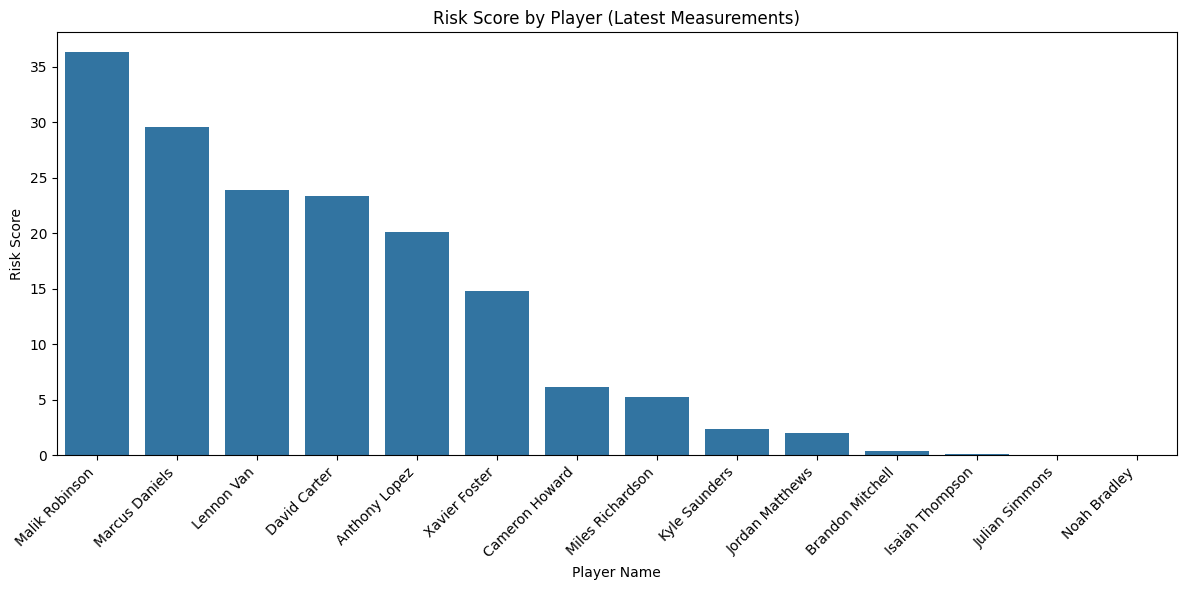

In [20]:
# Define ideal ranges for muscle imbalance metrics
ideal_ranges = {
    'Hamstring To Quad Ratio': (0.5, 0.8),
    'Quad Imbalance Percent': (-5, 5),
    'HamstringImbalance Percent': (-5, 5),
    'Calf Imbalance Percent': (-5, 5),
    'Groin Imbalance Percent': (-5, 5)
}

# Function to check if a value is within the ideal range
def is_within_range(value, range_tuple):
    return range_tuple[0] <= value <= range_tuple[1]

# Identify players at risk based on deviations from ideal ranges
risk_players = data.copy()

# Check each metric against its ideal range
for metric, ideal_range in ideal_ranges.items():
    risk_players[metric + ' Risk'] = ~risk_players[metric].apply(is_within_range, range_tuple=ideal_range)

# Filter players who have any risk
players_at_risk = risk_players[risk_players[[metric + ' Risk' for metric in ideal_ranges]].any(axis=1)]

# Display players at risk
players_at_risk[['Player Name', 'Date Recorded'] + list(ideal_ranges.keys()) + [metric + ' Risk' for metric in ideal_ranges]].head()# Calculate risk score for each player
def calculate_risk_score(row):
    score = 0
    for metric, ideal_range in ideal_ranges.items():
        if not is_within_range(row[metric], ideal_range):
            deviation = min(abs(row[metric] - ideal_range[0]), abs(row[metric] - ideal_range[1]))
            score += deviation
    return score

risk_players['Risk Score'] = risk_players.apply(calculate_risk_score, axis=1)

# Get the latest measurement for each player with their risk score
latest_measurements = risk_players.sort_values('Date Recorded').groupby('Player Name').last()
latest_measurements = latest_measurements.sort_values('Risk Score', ascending=False)


# Visualize risk scores
plt.figure(figsize=(12, 6))
sns.barplot(data=latest_measurements.reset_index(), x='Player Name', y='Risk Score')
plt.xticks(rotation=45, ha='right')
plt.title('Risk Score by Player (Latest Measurements)')
plt.tight_layout()
plt.show()


# Muscle Imbalance Analysis Summary

## Dataset Overview
- **Total Entries**: 182
- **Metrics**: Hamstring to Quad Ratio, Quad Imbalance Percent, Hamstring Imbalance Percent, Calf Imbalance Percent, Groin Imbalance Percent
- **Goal**: Analyze muscle imbalances to assess injury risk and recommend focus areas for performance improvement.

## Ideal Ranges for Metrics
| Metric                     | Ideal Range      | Description                                                                                   |
|----------------------------|------------------|-----------------------------------------------------------------------------------------------|
| **Hamstring to Quad Ratio**       | 0.6 - 0.8        | Balance of hamstring to quadriceps strength for knee stability.                               |
| **Quad Imbalance Percent**        | -5% to 5%        | Balance between left and right quadriceps.                                                    |
| **Hamstring Imbalance Percent**   | -5% to 5%        | Balance between left and right hamstrings.                                                    |
| **Calf Imbalance Percent**        | -5% to 5%        | Balance between left and right calf muscles.                                                  |
| **Groin Imbalance Percent**       | -5% to 5%        | Balance between left and right groin (adductor) muscles.                                      |

## Key Insights
1. **Hamstring to Quad Ratio**:
   - **Mean**: 0.71 (within ideal range), **Range**: 0.4 to 1.2.
   - **Deviations**: Values below 0.6 indicate hamstring weakness; values above 0.8 suggest quad underuse.

2. **Quad Imbalance Percent**:
   - **Mean**: 2.51% (within ideal range), **Range**: -11.5% to 15.2%.
   - **Deviations**: Values below -5% indicate weaker left quad; above 5% indicates stronger right quad.

3. **Hamstring Imbalance Percent**:
   - **Mean**: 0.98% (within ideal range), **Range**: -11.2% to 13.0%.
   - **Deviations**: Values below -5% indicate weaker left hamstring; above 5% indicates stronger right hamstring.

4. **Calf Imbalance Percent**:
   - **Mean**: 2.42% (within ideal range), **Range**: -11.7% to 14.9%.
   - **Deviations**: Values below -5% indicate weaker left calf; above 5% indicates stronger right calf.

5. **Groin Imbalance Percent**:
   - **Mean**: 2.44% (within ideal range), **Range**: -11.7% to 15.0%.
   - **Deviations**: Values below -5% indicate weaker left groin; above 5% indicates stronger right groin.

## Recommendations
- **Balance Training**: Focus on strengthening weak muscles identified outside the ideal range.
- **Injury Prevention**: Address asymmetries in hamstring-to-quad and side-to-side muscle balances to reduce injury risk.
- **Performance Improvement**: Achieving balance within the ideal range can enhance stability and performance.